# SWITZERLAND COVID-19 PROJECT

Using data updated daily from ECDC's website, we take a look at the number of cases and deaths of Switzerland within the dataset. This notebook only shows the Switzerland part.

Link for the  data:
https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from datetime import date

# load the csv file
df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df2 = df[df['cases']>= 10]
df = df[df['countriesAndTerritories']=='Switzerland']
df3 = df2[df2['countriesAndTerritories'] == 'Switzerland']
# Dataset updates automatically every time you rerun

today = date.today()
print("File Update Date:", today)

File Update Date: 2020-11-25


In [2]:
# Set the width of the number of characters for the rows and columns
pd.set_option('display.width', 320)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# How many instances where at least 10 cases were reported in a single day
Swiss_cases = df3.count()
print(Swiss_cases)
# Comment by Dan: 49 on April 23rd 2020, 191 on September 19rd 2020, Note that the first case was on 25/02/2020

dateRep                                                       239
day                                                           239
month                                                         239
year                                                          239
cases                                                         239
deaths                                                        239
countriesAndTerritories                                       239
geoId                                                         239
countryterritoryCode                                          239
popData2019                                                   239
continentExp                                                  239
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    239
dtype: int64


In [4]:
# rename all columns
df.columns = ['Date', 'D', 'M', 'Y', 'Cases', 'Deaths', 'Countries', 'Geolocal', 'Country Code' , 'Population', 'Continent', 'Cumu']

Check data type of each column, notice "Date" is not in __datetime__ format. We can use the command print(df4.info()) to check the data type of each column. Date formatting also seems to be wrong since download (months and days format sometimes inversed). We will fix that.

In [5]:
# Delete unrequired columns: Date, Countries, Geolocal, Country Code, Population & Continent (Added later)
df = df.drop(columns= ['Date','Countries','Geolocal', 'Country Code', 'Population', 'Continent', 'Cumu'])

In [6]:
# Create a New Date column based on the Day, Month and Year columns and delete the D, M and Y columns
# Automatic data type change as well
Date = pd.to_datetime((df.Y*10000+df.M*100+df.D).apply(str), format='%Y%m%d')
df.insert(0,"Date", Date)
df = df.drop(columns= ['D','M','Y'])
# print(df.info())

In [7]:
# Delete unrequired days of data (days where there were 0 cases and 0 deaths)
# unrequired_days = df[(df['Deaths'] == 0) & (df['Cases'] == 0)].index
# df4.drop(unrequired_days, inplace = True)

In [8]:
# Reset the indexes
df = df.reset_index(drop=True)

In [9]:
# save data to new csv
# df.to_csv('Covid_19_Switzerland_Data.csv')

We could also apply some styling into the dataframe with __highlights__. I put some code in the cell below commented.

In [10]:
# Highlight Deaths and Cases values with bars
df.style.bar(subset=['Cases', 'Deaths'], color='#d65f5f')

,Date,Cases,Deaths
0,2020-11-25 00:00:00,4221,150
1,2020-11-24 00:00:00,9688,213
2,2020-11-23 00:00:00,0,0
3,2020-11-22 00:00:00,0,0
4,2020-11-21 00:00:00,4923,111
5,2020-11-20 00:00:00,4988,79
6,2020-11-19 00:00:00,6085,84
7,2020-11-18 00:00:00,4522,140
8,2020-11-17 00:00:00,12779,197
9,2020-11-16 00:00:00,0,0


The highlighting provides a simple and nice way of visualizing the values within the dataframe. Notice how they don't update the data on weekends.

## 2) Statistics & Visualizations

In [11]:
# Count how much data in each column
print(df.count())

Date      331
Cases     331
Deaths    331
dtype: int64


In [12]:
# Statistical measures of all columns
print(df.describe().round())

         Cases  Deaths
count    331.0   331.0
mean     917.0    12.0
std     2612.0    29.0
min        0.0     0.0
25%        4.0     0.0
50%      103.0     1.0
75%      377.0     7.0
max    21842.0   213.0


In [13]:
# See correlation within data
print(df.corr())

          Cases   Deaths
Cases   1.00000  0.67848
Deaths  0.67848  1.00000


__Another way to observe the correlation:__ We look at the Pearson Correlation between cases and deaths using the SciPy library. A coefficient of 1 shows positive correlation and -1 shows negative correlation. a coefficient of 0 shows no correlation. A p-value below 0.001 shows strong certainty in our result. A p-value above 0.1 shows no certainty. A p-value between 0.05 to 0.1 shows moderate to weak certainty.

In [14]:
# Pearson Correlation
pearson_coef, p_value = sp.pearsonr(df['Cases'],df['Deaths'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is 0.6784797103459438  with a P-value of P =  5.55171742137589e-46


In [15]:
# Total number of cases and deaths
sum_cases = df['Cases'].sum()
sum_deaths = df['Deaths'].sum()
print('The total number of reported cases is ' + str(sum_cases) + '.')
print('The total number of reported deaths is ' + str(sum_deaths) + '.')

The total number of reported cases is 303392.
The total number of reported deaths is 3930.


In [16]:
# Average number of cases and deaths
ave_cases = df['Cases'].mean()
ave_deaths = df['Deaths'].mean()
print('The average number of reported cases daily is ' + str(round(ave_cases, 0)) + '.')
print('The average number of reported deaths daily is ' + str(round(ave_deaths, 0)) + '.')

The average number of reported cases daily is 917.0.
The average number of reported deaths daily is 12.0.


In [17]:
# Average Mortality Rate
ave_mortality_rate = (ave_deaths/ave_cases)*100
round(ave_mortality_rate, 2)
print('The average mortality rate is ' + str(round(ave_mortality_rate, 2)) + '%')

The average mortality rate is 1.3%


In [18]:
world_pop = 7500000000
print("This mortality rate is quite high if you compare it to other countries. If you applied this mortality rate to the whole world population, we would observe approximately " + str(round((ave_mortality_rate*world_pop)/100000000, 1)) + " million deaths worldwide!")

print("Another thing to note, the number of deaths is more precise than the number of cases. This would mean that the real mortality rate should normally be lower. On top that, we will look at the graph of cases vs deaths over time and notice the amount of deaths is quite stable daily, which might make us question the quarantine for Switzerland in general.")

This mortality rate is quite high if you compare it to other countries. If you applied this mortality rate to the whole world population, we would observe approximately 97.2 million deaths worldwide!
Another thing to note, the number of deaths is more precise than the number of cases. This would mean that the real mortality rate should normally be lower. On top that, we will look at the graph of cases vs deaths over time and notice the amount of deaths is quite stable daily, which might make us question the quarantine for Switzerland in general.


In [19]:
# Highest reported days for cases and deaths
max_cases = df['Cases'].max()
max_deaths = df['Deaths'].max()
print('The max number of reported cases in a day is ' + str(max_cases) + '.')
print('The max number of reported deaths in a day is ' + str(max_deaths) + '.')

The max number of reported cases in a day is 21842.
The max number of reported deaths in a day is 213.


In [20]:
# Find index to match cases date
max_cases_index = df[df['Cases'] == df.Cases.max()].index.values
print(max_cases_index)

[22]


In [21]:
# Find which day most cases were
max_day_cases = df.iloc[max_cases_index, 0]
print(max_day_cases)

22   2020-11-03
Name: Date, dtype: datetime64[ns]


In [22]:
# Find index to match deaths date
max_deaths_index = df[df['Deaths'] == df.Deaths.max()].index.values
print(max_deaths_index)

[1]


In [23]:
# Find which day most deaths were
max_day_deaths = df.iloc[max_deaths_index, 0]
print(max_day_deaths)

1   2020-11-24
Name: Date, dtype: datetime64[ns]


We now look at some visualisation:

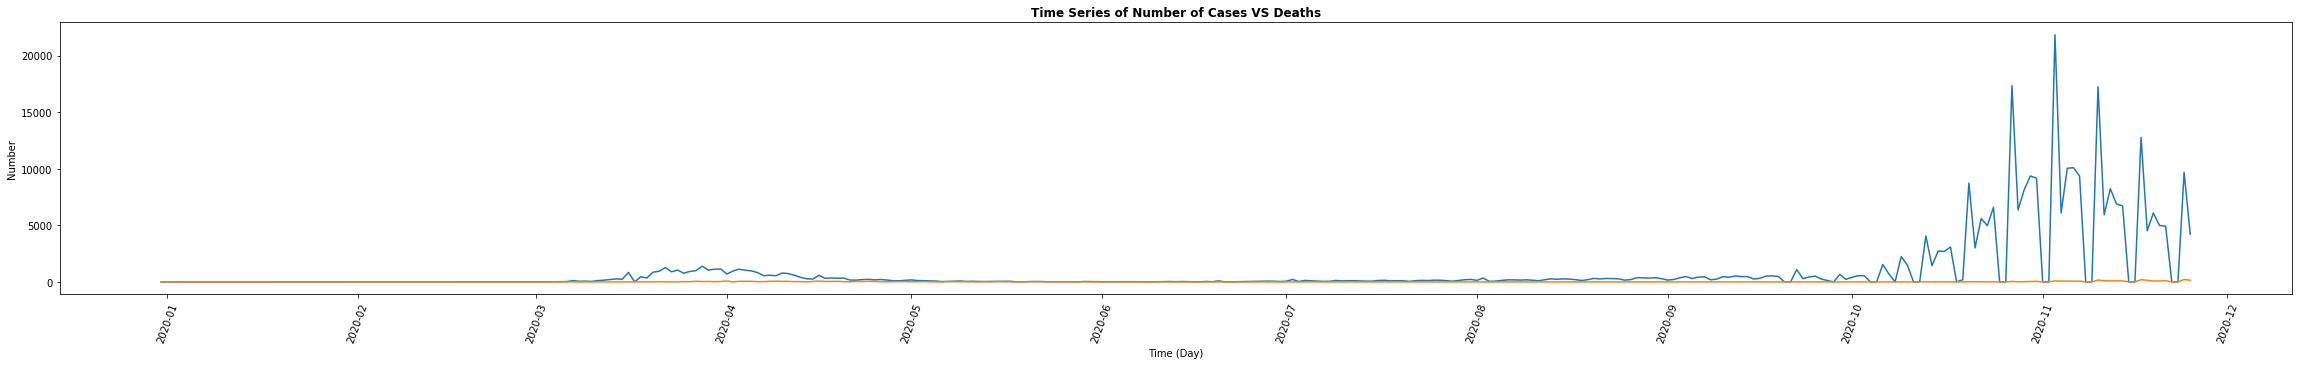

In [32]:
# Plots
pd.plotting.register_matplotlib_converters()

plt.plot(df['Date'], df['Cases'],label = 'Cases')
plt.plot(df['Date'], df['Deaths'], label = 'Deaths')
plt.title('Time Series of Number of Cases VS Deaths', fontsize='large', fontweight='bold')
#plt.xlim(pd.Timestamp('2020-02-25'), pd.Timestamp('2020-12-20'))
plt.rc('figure',figsize = ('40,5')) # changes figure's width and height
plt.xticks(rotation= 70)
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.show()

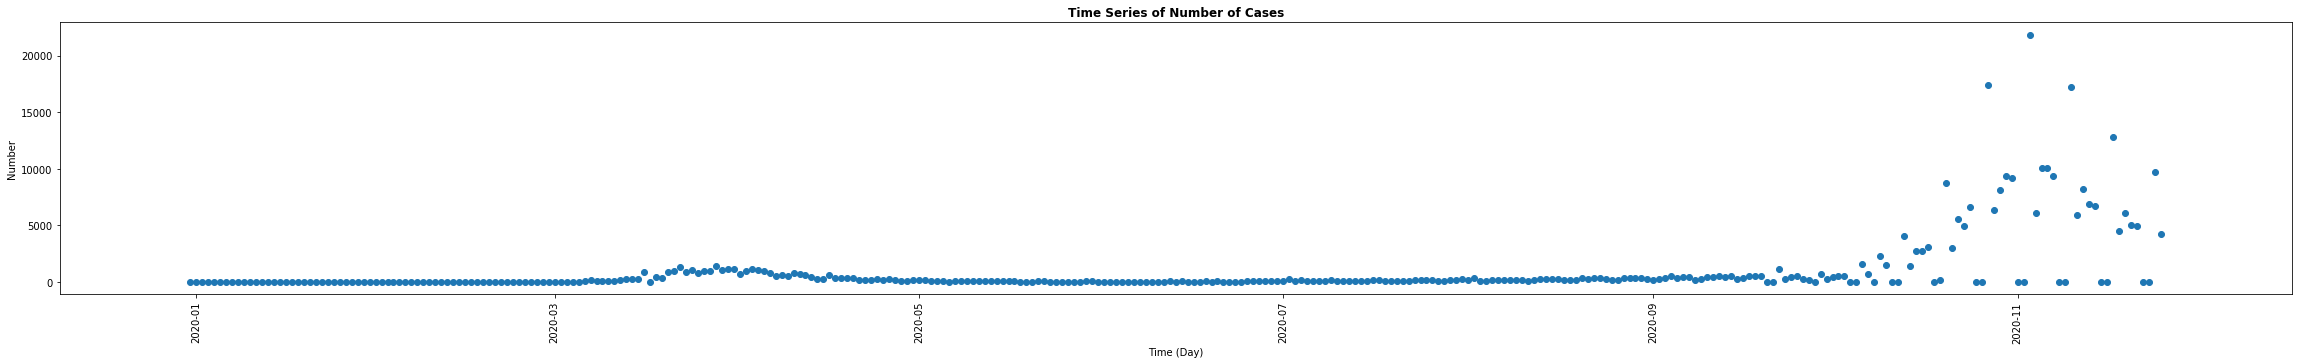

In [25]:
# Scatter Plot of Number of cases
plt.scatter(df['Date'], df['Cases'])
plt.title('Time Series of Number of Cases',fontsize='large', fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.rc('figure',figsize = ('40,5')) # changes figure's width and height
plt.show()

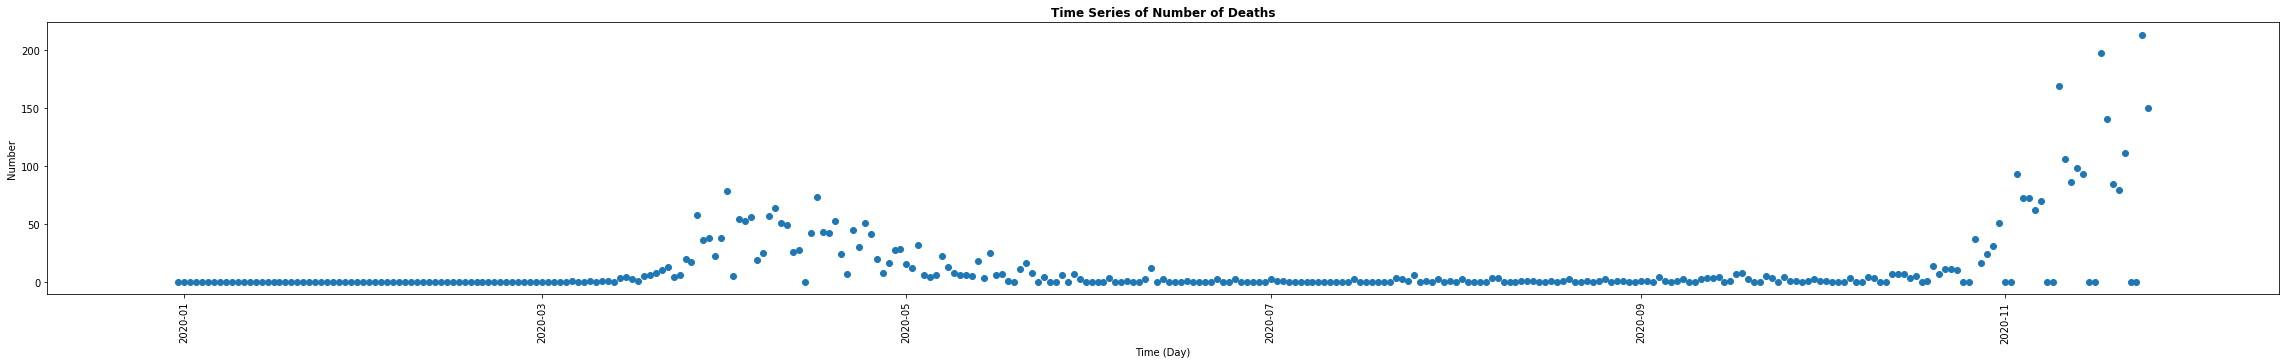

In [26]:
plt.scatter(df['Date'], df['Deaths'])
plt.title('Time Series of Number of Deaths',fontsize='large', fontweight='bold')
plt.xticks(rotation='vertical')
plt.xlabel('Time (Day)');
plt.ylabel('Number');
plt.rc('figure',figsize = ('40,5')) # changes figure's width and height
plt.show()

Let's plot some graphs using the seaborn library. We will look into the correlation between cases and deaths and plot a regression line and its residual plot. This is done to understand the relationship between the two variables. This can also be used to predict the number of deaths as a model. However, the model won't forecast very accurately as it will be seen below.

Text(0.5, 1.0, 'Simple Linear Regression')

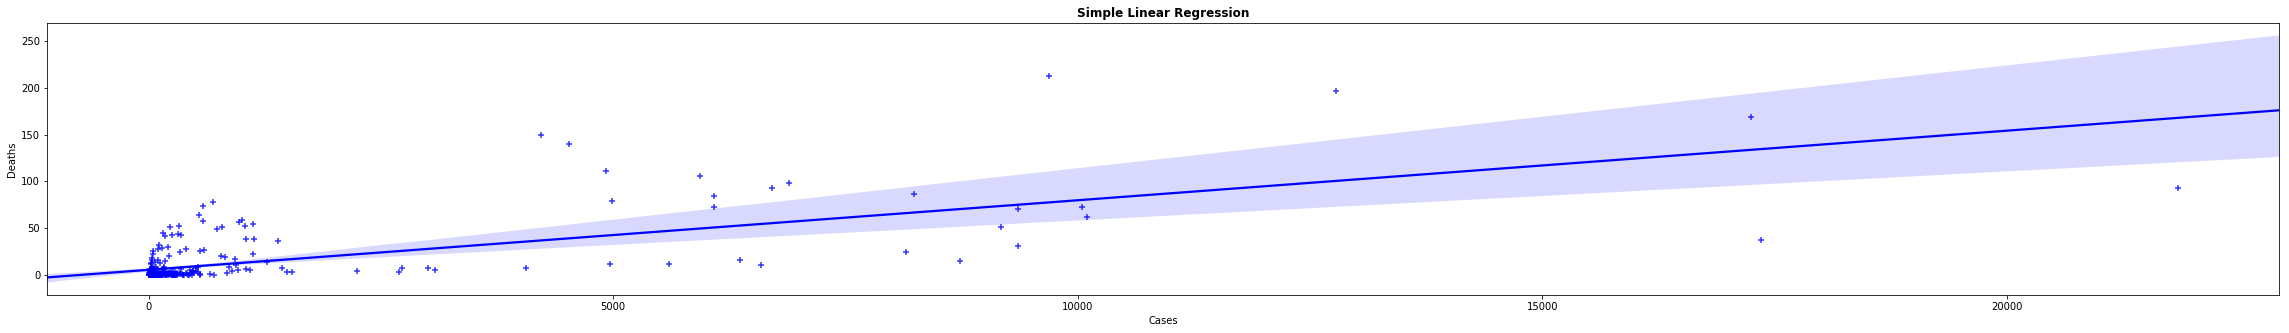

In [27]:
# Simple Linear Regression
chart = sns.regplot(x = 'Cases', y = 'Deaths', data = df, color = 'blue', marker = '+')
plt.title('Simple Linear Regression',fontsize='large', fontweight='bold')

A good way to visualize the variance of the data is to use a residual plot. The residual is the distance from the data point to the fitted regression line. If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data. This is because randomly spread out residuals means that the variance is constant, and hence the linear model is a good fit for this data.

Text(0.5, 1.0, 'Residual Plot')

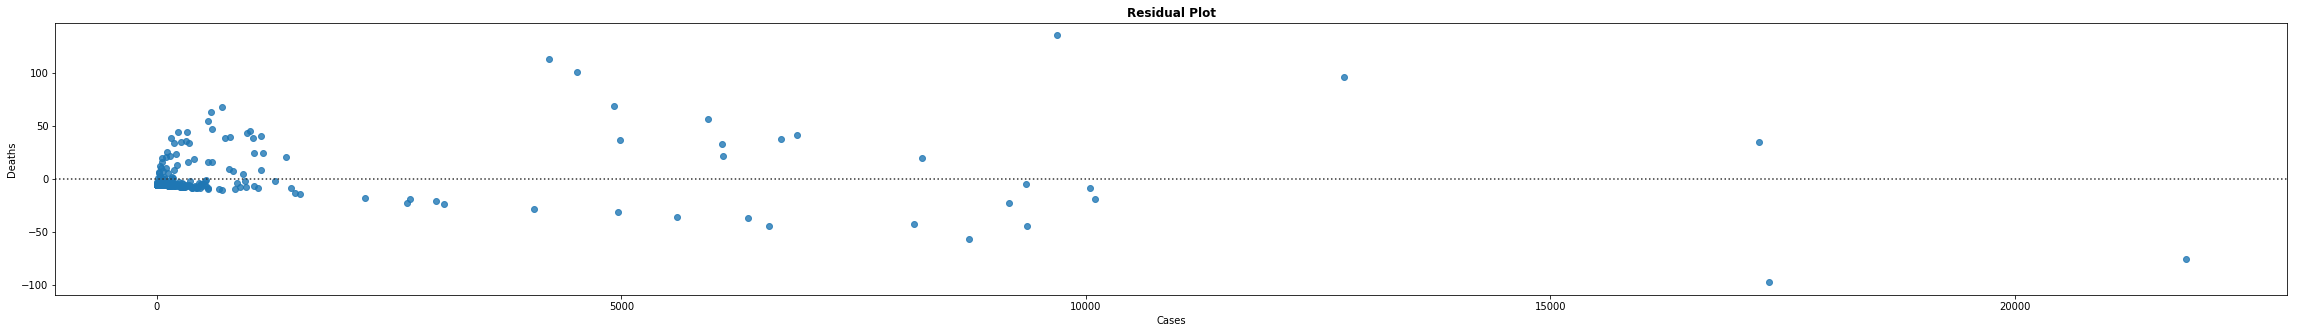

In [28]:
# Residual Plot
chart2 = sns.residplot(df['Cases'], df['Deaths'])
plt.title('Residual Plot',fontsize='large', fontweight='bold')

We could argue that a non-linear model __could__ be more suitable if we had more data.

__Note:__ Many plots could be made using the matplotlib and seaborn libraries but exporting the data onto PowerBI or Tableau definitely is a better choice as interactive dashboards can be made on those softwares, making them more practical from a business standpoint.

First, let's check the __accuracy__ of our model. Two important measures are often used in statistics to compare models and/or to determine the accuracy of a model:

- R^2 (R squared)

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model. The higher the value, the better the fit. 

- MSE (Mean Squared Error)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ). A larger MSE means that the data values are dispersed widely around its mean. The lower the MSE (closest to 0), the higher the accuracy. MSE is better used when comparing models. This does not mean that the one with lowest MSE is necessarily the best model.

__Note:__ There are also other metrics: MAE, RMSE, RAE, RSE, ...

In [29]:
# Find the R^2
lm = LinearRegression()
X = df[['Cases']]
Y = df['Deaths']
lm.fit(X,Y)
score = lm.score(X, Y)
print('The R-square is ' + str(round(score, 4)*100) + '%.' + ' We can say that approximately ' + str(round(score, 4)*100) + '%'  + ' of the variation of deaths is explained by this simple linear model.')

The R-square is 46.03%. We can say that approximately 46.03% of the variation of deaths is explained by this simple linear model.


In [30]:
# Predict the output to then compare to actual results
Yhat=lm.predict(X)
print('The output of the first five predicted value is: ', Yhat[0:5])

The output of the first five predicted value is:  [36.50419053 77.2552459   5.04082767  5.04082767 41.73690332]


In [31]:
# Find MSE
mse = mean_squared_error(df['Deaths'], Yhat)
print('The mean square error of Deaths and predicted value is', str(round(mse, 3)))

The mean square error of Deaths and predicted value is 442.96


__Note:__ It is understandable that __predicting__ or __estimating__ the amount of deaths from such a small data sample (using only the number of cases as the main predicting variable) is not going to be accurate. Most of the time, the more variables we have, the better our model is at predicting. However, having too many variables could also cause noise. See conclusion for more.

## Conclusion:

This basic project doesn't really bring out much that isn't on the news, although the news do not do a decent job at all. This notebook's original intent was just to show the basics of coding and finding simple analytics, however it served its purpose for individual use and I hope for a reader.

Regarding COVID-19, some people question if the virus is a real threat, or whether there should be a quarantine in Switzerland, when we look at the number of deaths vs the number of cases. Granted that the real reason you should have a quarantine is to decrease the spread, efficiently decrease the amount of people in the hospital and avoid long term disabilities caused by the virus, many people (including government officials) forget these core concepts. 

Many "experts" do not understand the real meaning behind statistics or even simple probabilities. As a matter of fact, we are highly connected today (unsurprisingly) and the contamination factor cannot/should not be considered linear AND must be considered exponential/non-linear. What I mean by this is that one person can easily affect the whole sample, hence why we should be skeptical of the knowledge we derive from such basic data. Much of the basic statistics on the news are hence quite meaningless as they are framed badly by the news on top of the data quality not being great either (to follow up on data quality, it would be good to have the number of tests administered, the recontamination factor percentage, the data being updated for the weekends rather than only weekdays).

Events such as pandemics should not be taken lightly by just looking at these simple numbers if you are trying to save everyone. Then, comes the question of ethics (be a Darwinist or try to save everyone). The fact that idiotic governments took such bad decisions since the beginning of the spread in January (they could have saved trillions if they took the right measures then) and the way the virus has been dealt since is just a clear lack of leadership and understanding if the end goal is to indeed "save people and not surcharge hospitals". Let's even look at the bigger picture: the economy will be blamed on this virus when most of it was already broken. Small businesses are being forced to close down and big companies will get bailouts. I end this with a quote I like:

__Everything that happens doesn't happen for a reason but everything that survives, survives for a reason.__